In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.drop(['Loan_ID','Gender'],axis=1,inplace=True) # droping columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            611 non-null    object 
 1   Dependents         599 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [6]:
df.isnull().sum() # checking the null values

Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Filling the null values
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [8]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [9]:
df.isnull().sum()

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df.describe() # Describing the data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
# Converting categorical values to number
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [12]:
df['Married'] = le.fit_transform(df['Married'])

In [13]:
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    int64  
 1   Dependents         614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 52.9 KB


In [15]:
df.nunique()

Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [16]:
for column in df.columns:
  print(df[column].value_counts())
  print('________________________________')

1    401
0    213
Name: Married, dtype: int64
________________________________
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
________________________________
0    480
1    134
Name: Education, dtype: int64
________________________________
0    532
1     82
Name: Self_Employed, dtype: int64
________________________________
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
________________________________
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
________________________________
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: 

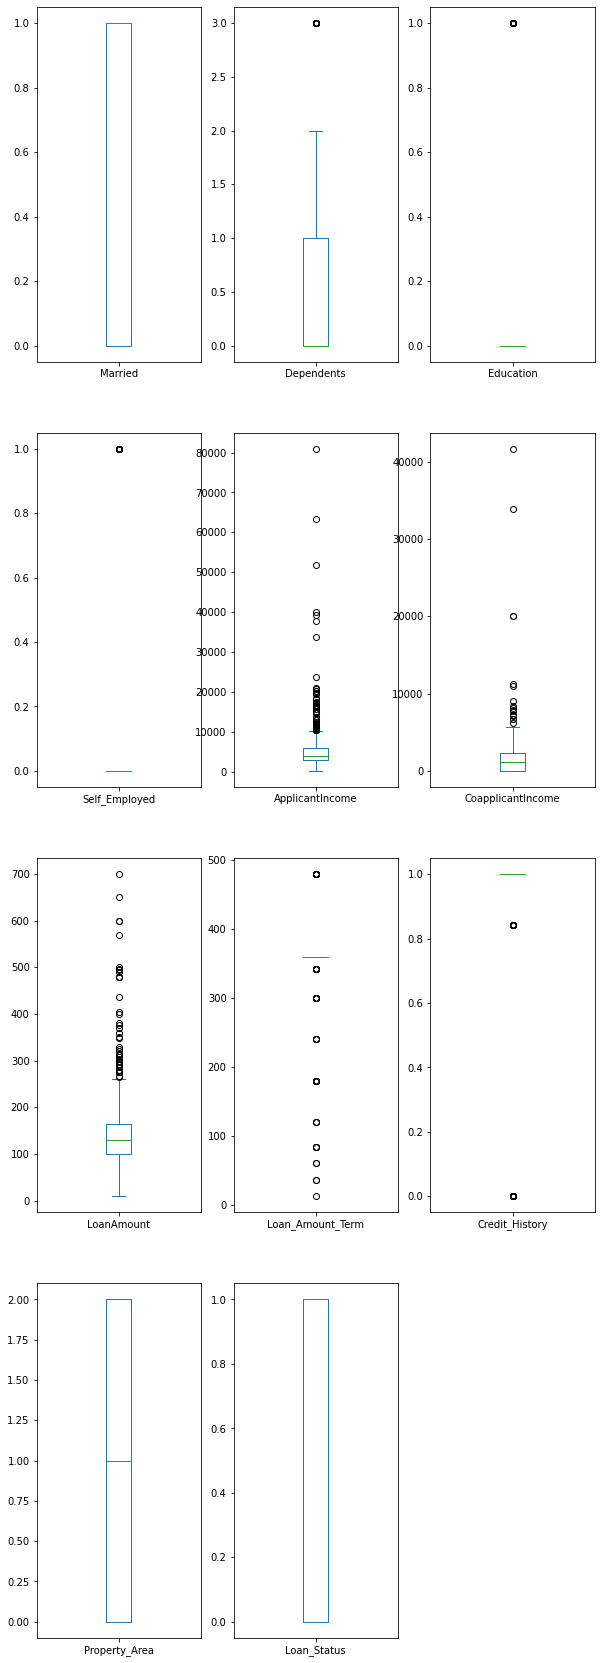

In [17]:
df.plot(kind='box',layout=(4,3),subplots=True,figsize=(10,30)); # checking outliers

In [18]:
# Removing Outliers

from scipy import stats

z = np.abs(stats.zscore(df))
index = (np.where(z > 3)[0])

df_new = df.drop(df.index[index])

In [19]:
df_new.shape

(577, 11)

In [20]:
df.shape

(614, 11)

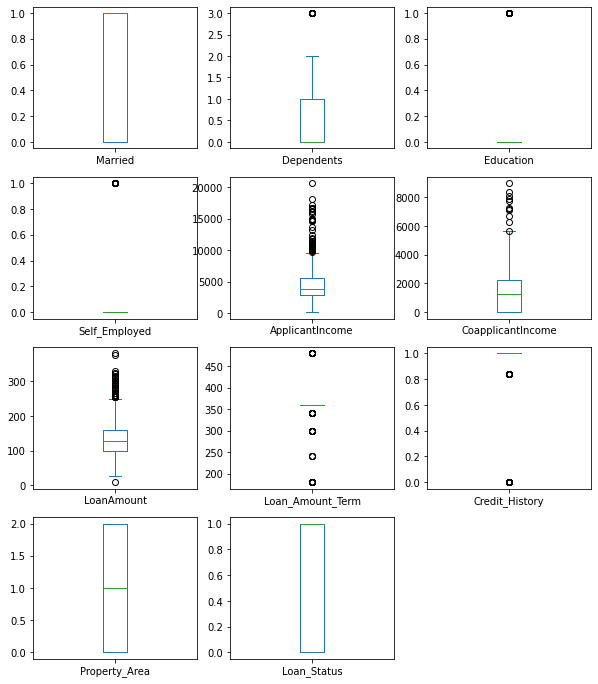

In [21]:
df_new.plot(kind='box',layout=(4,3),subplots=True,figsize=(10,12));

In [22]:
df.columns

Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
cor = df.corr() # checking correlation

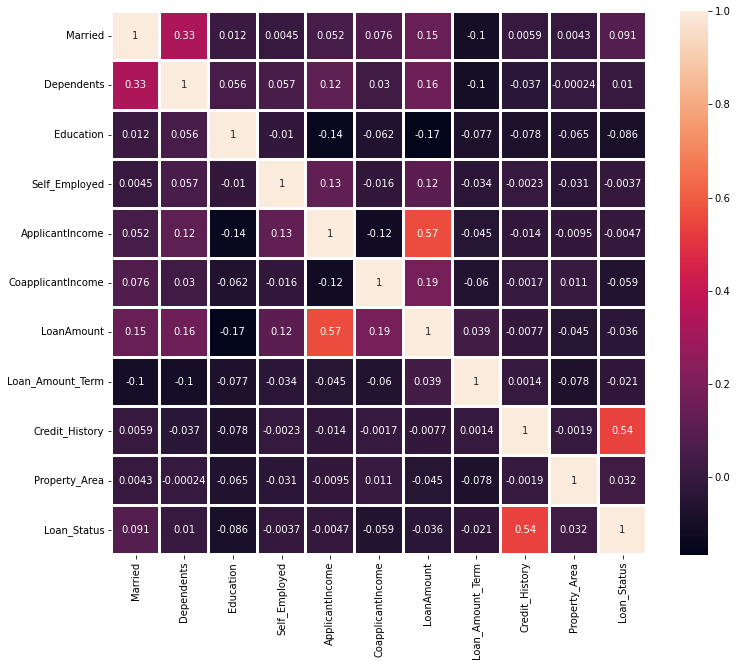

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,linewidth=2)

In [31]:
X = df.drop(['Loan_Status'],axis=1)

In [35]:
y = df['Loan_Status']

In [36]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler().fit_transform(X)

In [38]:
#checking for is there any VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = ss

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns
vif

,VIF,Features
0,1.150159,Married
1,1.161591,Dependents
2,1.061516,Education
3,1.023534,Self_Employed
4,1.629778,ApplicantIncome
5,1.137310,CoapplicantIncome
6,1.709072,LoanAmount
7,1.048503,Loan_Amount_Term
8,1.008317,Credit_History
9,1.015512,Property_Area


In [41]:
x=ss

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=2)

In [50]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train,y_train)
lr_predi = lr.predict(x_test)

print('Accuracy of Logistic Regression :{:.2f}',accuracy_score(y_test,lr_predi))
print('_'*60)
lrcm=confusion_matrix(y_test,lr_predi)
print('\033[1m''Confusion Matrix\n',lrcm)
print('_'*60)
print('\n Classification Report\n',classification_report(y_test,lr_predi))

Accuracy of Logistic Regression :{:.2f} 0.7832512315270936
____________________________________________________________
Confusion Matrix
 [[ 25  40]
 [  4 134]]
____________________________________________________________

 Classification Report
               precision    recall  f1-score   support

           0       0.86      0.38      0.53        65
           1       0.77      0.97      0.86       138

    accuracy                           0.78       203
   macro avg       0.82      0.68      0.70       203
weighted avg       0.80      0.78      0.75       203



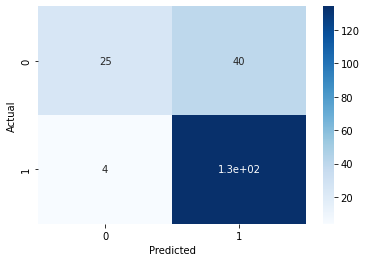

In [60]:
# heatmap of confusion matrix of logistic regression

sns.heatmap(lrcm,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
# CROSS VALIDATION FOR LOGISTIC REGRESSION
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr,x,y,cv=5) 
print(score)

print(score.mean())
print(score.std())

[0.81300813 0.77235772 0.7804878  0.85365854 0.81967213]
0.8078368652538984
0.02923416378093254


In [52]:
# AUC ROC CURVE FOR LOGISTIC REGRESSION
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

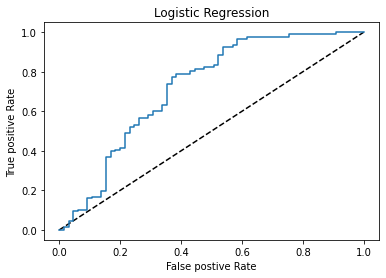

In [54]:
pred_lr_proba = lr.predict_proba(x_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,pred_lr_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False postive Rate')
plt.ylabel('True positive Rate')
plt.title('Logistic Regression')
plt.show()

In [59]:
lr_auc_score = roc_auc_score(y_test,lr_predi)
lr_auc_score

0.6778149386845038

In [61]:
# DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
# hyperparameter tuning
criterion={'criterion':['gini','entropy']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=dtc, param_grid=criterion)
grid.fit(x_train,y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)                                                     

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})
0.698354393182486
gini
{'criterion': 'gini'}


In [62]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train,y_train)
predi_dtc = dtc.predict(x_test)

print("Decision Tree Classifier  ACCURACY SCORE :",accuracy_score(y_test,predi_dtc))
print("_"*60)
dtccm = confusion_matrix(y_test,predi_dtc)
print("Decision Tree Classifier CONFUSION MATRIX :",dtccm)
print("_"*90)
print("Decision Tree Classifier CLASSIFICATION REPORT :",classification_report(y_test,predi_dtc))

Decision Tree Classifier  ACCURACY SCORE : 0.6798029556650246
____________________________________________________________
Decision Tree Classifier CONFUSION MATRIX : [[ 38  27]
 [ 38 100]]
__________________________________________________________________________________________
Decision Tree Classifier CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.50      0.58      0.54        65
           1       0.79      0.72      0.75       138

    accuracy                           0.68       203
   macro avg       0.64      0.65      0.65       203
weighted avg       0.70      0.68      0.69       203



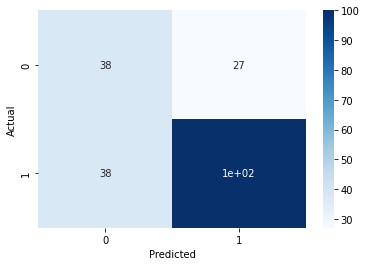

In [63]:
# heatmap for confusion matrix of Decision Tree Classifier

sns.heatmap(dtccm,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

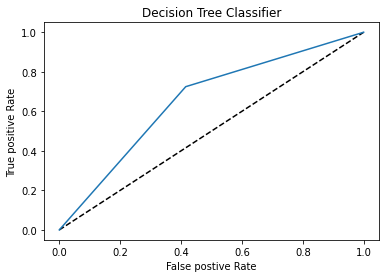

In [64]:
# auc roc curve of Decision Tree Classifier
pred_dtc_proba = dtc.predict_proba(x_test)[:,1]
dfpr,dtpr,dthresholds = roc_curve(y_test,pred_dtc_proba)


plt.plot([0,1],[0,1],'k--')
plt.plot(dfpr,dtpr,label='Decision Tree Classifier')
plt.xlabel('False postive Rate')
plt.ylabel('True positive Rate')
plt.title('Decision Tree Classifier')
plt.show()

In [65]:
dtc_auc_score = roc_auc_score(y_test,predi_dtc)# roc auc score
dtc_auc_score

0.6546265328874025

In [67]:
# cross validation for Decision Tree Classifier

from sklearn.model_selection import cross_val_score

dtc_score = cross_val_score(dtc,x,y,cv=5)
print(dtc_score)

print(dtc_score.mean())
print(dtc_score.std())

[0.69105691 0.6504065  0.7804878  0.69918699 0.72131148]
0.7084899373583899
0.042690104723046435


In [68]:
# SUPPORT VECTOR MACHINE

from sklearn.svm import SVC
svc = SVC()

# hyperparameter tuning
kernel={'kernel':['linear','poly','rbf']}
from sklearn.model_selection import GridSearchCV
gridsvc = GridSearchCV(estimator=svc, param_grid=kernel)
gridsvc.fit(x_train,y_train)
print(gridsvc)

print(gridsvc.best_score_)
print(gridsvc.best_estimator_.kernel)
print(gridsvc.best_params_)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['linear', 'poly', 'rbf']})
0.8175139582721128
linear
{'kernel': 'linear'}


In [70]:
svc = SVC(kernel='linear', probability=True)
svc.fit(x_train,y_train)
svc_predi = svc.predict(x_test)

print("SUPPORT VECTOR MACHINE  ACCURACY SCORE :",accuracy_score(y_test,svc_predi))
print("_"*60)
svccm = confusion_matrix(y_test,svc_predi)
print("SUPPORT VECTOR MACHINE CONFUSION MATRIX :",svccm)
print("_"*90)
print("SUPPORT VECTOR MACHINE CLASSIFICATION REPORT :",classification_report(y_test,svc_predi))

SUPPORT VECTOR MACHINE  ACCURACY SCORE : 0.7931034482758621
____________________________________________________________
SUPPORT VECTOR MACHINE CONFUSION MATRIX : [[ 26  39]
 [  3 135]]
__________________________________________________________________________________________
SUPPORT VECTOR MACHINE CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.90      0.40      0.55        65
           1       0.78      0.98      0.87       138

    accuracy                           0.79       203
   macro avg       0.84      0.69      0.71       203
weighted avg       0.81      0.79      0.77       203



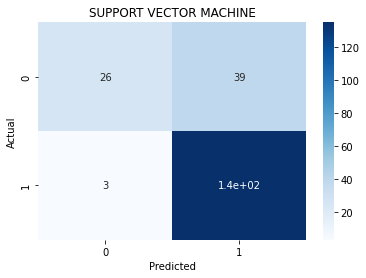

In [71]:
#heatmap of confusion matrix of SUPPORT VECTOR MACHINE 
sns.heatmap(svccm,annot=True,cmap='Blues')
plt.title("SUPPORT VECTOR MACHINE")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

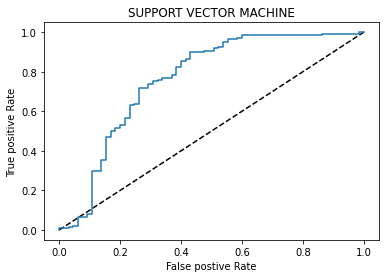

In [72]:
# auc roc curve of SUPPORT VECTOR MACHINE
pred_svc_proba = svc.predict_proba(x_test)[:,1]
sfpr,stpr,sthresholds = roc_curve(y_test,pred_svc_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(sfpr,stpr,label='SUPPORT VECTOR MACHINE')
plt.xlabel('False postive Rate')
plt.ylabel('True positive Rate')
plt.title('SUPPORT VECTOR MACHINE')
plt.show()

In [73]:
svc_auc_score = roc_auc_score(y_test,svc_predi)# roc auc score
svc_auc_score

0.6891304347826086

In [74]:
# cross validation for Support Vector machine



svc_score = cross_val_score(svc,x,y,cv=5)
print(svc_score)

print(svc_score.mean())
print(svc_score.std())

[0.81300813 0.7804878  0.7804878  0.85365854 0.81967213]
0.809462881514061
0.027383073694490688


In [75]:
# KNEIGHBORS CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
# hyperparameter tuning
n_neighbors={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
from sklearn.model_selection import GridSearchCV
gridknn = GridSearchCV(estimator=knn, param_grid=n_neighbors)
gridknn.fit(x_train,y_train)
print(gridknn)

print(gridknn.best_score_)
print(gridknn.best_estimator_.n_neighbors)
print(gridknn.best_params_)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})
0.8005583308845138
5
{'n_neighbors': 5}


In [76]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predi_knn = knn.predict(x_test)

print("KNEIGHBORS CLASSIFIER  ACCURACY SCORE :",accuracy_score(y_test,predi_knn))
print("_"*60)
knncm = confusion_matrix(y_test,predi_knn)
print("KNEIGHBORS CLASSIFIER CONFUSION MATRIX :",knncm)
print("_"*90)
print("KNEIGHBORS CLASSIFIER CLASSIFICATION REPORT :",classification_report(y_test,predi_knn))

KNEIGHBORS CLASSIFIER  ACCURACY SCORE : 0.7980295566502463
____________________________________________________________
KNEIGHBORS CLASSIFIER CONFUSION MATRIX : [[ 26  39]
 [  2 136]]
__________________________________________________________________________________________
KNEIGHBORS CLASSIFIER CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.93      0.40      0.56        65
           1       0.78      0.99      0.87       138

    accuracy                           0.80       203
   macro avg       0.85      0.69      0.71       203
weighted avg       0.83      0.80      0.77       203



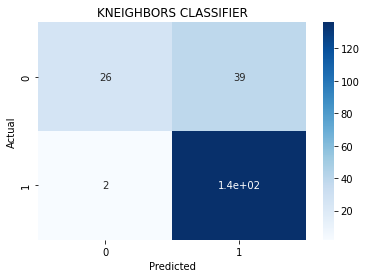

In [77]:
#heatmap of confusion matrix of KNEIGHBORS CLASSIFIER 
sns.heatmap(knncm,annot=True,cmap='Blues')
plt.title("KNEIGHBORS CLASSIFIER")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

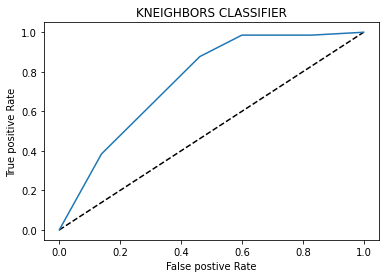

In [78]:
# auc roc curve of KNEIGHBORS CLASSIFIER
pred_knn_proba = knn.predict_proba(x_test)[:,1]
kfpr,ktpr,kthresholds = roc_curve(y_test,pred_knn_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(kfpr,ktpr,label='KNEIGHBORS CLASSIFIER')
plt.xlabel('False postive Rate')
plt.ylabel('True positive Rate')
plt.title('KNEIGHBORS CLASSIFIER')
plt.show()

In [79]:
knn_auc_score = roc_auc_score(y_test,predi_knn)# roc auc score
knn_auc_score

0.6927536231884058

In [81]:
# cross validation for KNEIGHBORS CLASSIFIER



knn_score = cross_val_score(knn,x,y,cv=5)
print(knn_score)

print(knn_score.mean())
print(knn_score.std())

[0.78861789 0.7804878  0.75609756 0.78861789 0.79508197]
0.7817806210848993
0.013650737321294418


**KNeighbors Classifier is giving best ACcuracy score hence saving the model**

In [82]:
import joblib

# saving the model
joblib.dump(knn,'knnfile.obj')

['knnfile.obj']

In [83]:
knn_from_joblib = joblib.load('knnfile.obj') # loading the model